In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Dropout 
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.metrics import mean_squared_error,r2_score 

# Generate Data 

In [4]:
X_train = np.linspace(-1,1,20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1,1,20)

In [11]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

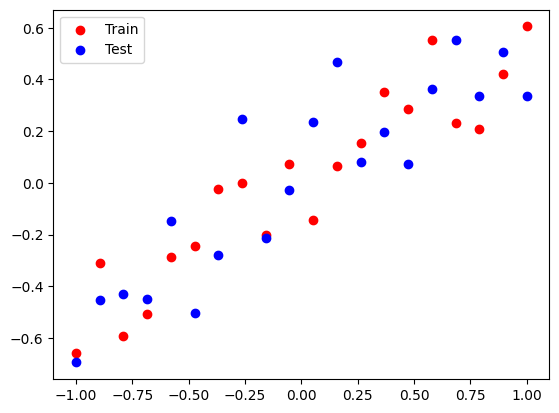

In [12]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regreasion model 

In [13]:
model = Sequential() 
model.add(Dense(128,input_dim=1 , activation='relu'))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="linear"))
adam = Adam(learning_rate=0.01)

model.compile(loss='mse',optimizer=adam,metrics=['mse'])

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history=model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=False)

In [16]:
_ ,train_mse = model.evaluate(X_train,y_train,verbose=0)
_ ,test_mse = model.evaluate(X_test,y_test,verbose=0)

In [18]:
print("Train : {} , test {}".format(train_mse,test_mse))

Train : 0.005008712410926819 , test 0.04627469927072525


In [19]:
y_pred =model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


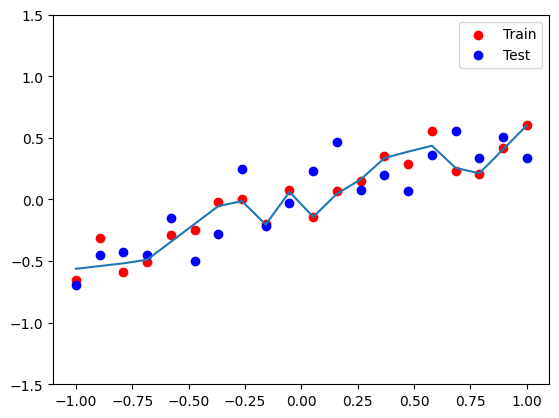

In [21]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# overfiting modelm


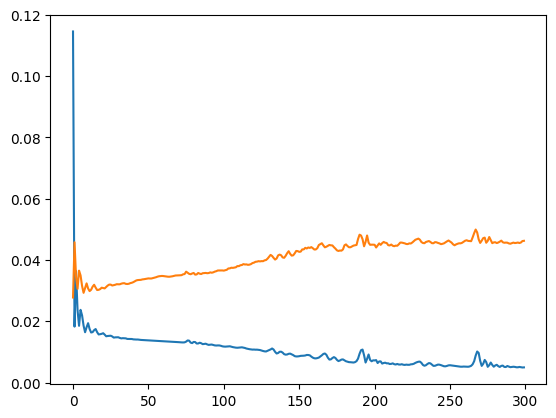

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [24]:
# gap beting the word 

In [25]:
model = Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

adam =Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
history=model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=False)

In [27]:
_ ,train_mse = model.evaluate(X_train,y_train,verbose=0)
_ ,test_mse = model.evaluate(X_test,y_test,verbose=0)

In [28]:
print("Train : {} , test {}".format(train_mse,test_mse))

Train : 0.013002187013626099 , test 0.039741721004247665


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


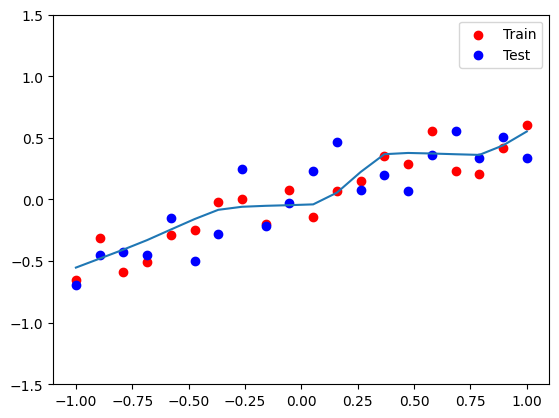

In [29]:
y_pred=model.predict(X_test)
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

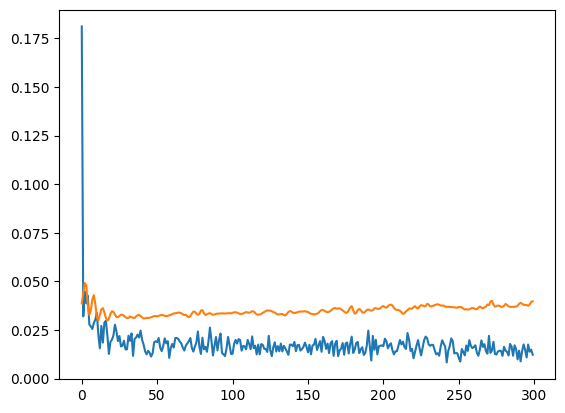

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [31]:
# loss is reduced to zero